#Importing libraries and cleaned_df_Eg dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
warnings.filterwarnings("ignore")
df=pd.read_csv('cbm_vbm_new.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,Cs,FA,MA,Pb,Sn,I,Br,ML_Eg,BG,CBM,VBM
0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.434,1.564,-3.9,-5.45
1,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.438,1.709,-3.6,-5.40


#Heatmap

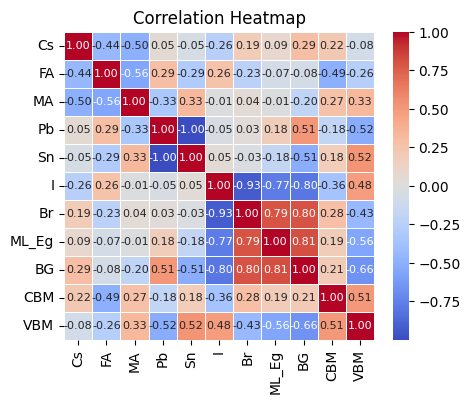

In [3]:
df1=df.iloc[:,0:]
corr_matrix = df1.corr()

#Draw the heatmap
plt.figure(figsize=(5, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,  annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

#Data Prep

In [4]:
dfx=df.iloc[:,:-2]
X=dfx.values
y=df.iloc[:,-2].values
y=y.reshape(len(y),1)
dfx

,Cs,FA,MA,Pb,Sn,I,Br,ML_Eg,BG
0,0.0,0.0,1.0,1.00,0.00,3.0,0.0,1.434,1.564
1,1.0,0.0,0.0,1.00,0.00,3.0,0.0,1.438,1.709
2,1.0,0.0,0.0,1.00,0.00,2.0,1.0,1.523,1.877
3,1.0,0.0,0.0,1.00,0.00,0.0,3.0,1.589,2.328
4,0.0,0.5,0.5,0.50,0.50,3.0,0.0,1.257,1.255
...,...,...,...,...,...,...,...,...,...
105,1.0,0.0,0.0,0.25,0.75,3.0,0.0,1.275,1.285
106,0.0,1.0,0.0,0.00,1.00,3.0,0.0,1.378,1.307
107,1.0,0.0,0.0,1.00,0.00,2.0,1.0,1.523,1.877
108,1.0,0.0,0.0,0.70,0.30,3.0,0.0,1.356,1.419


#Ensemble Learning

##Random Forest

In [5]:
from sklearn.ensemble import RandomForestRegressor
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.15, random_state=100)
rf=RandomForestRegressor()
rf.fit(X_train1,y_train1)

# Calculate cross-validated RMSE
mse_scores1 = cross_val_score(estimator=rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores1 = np.sqrt(-mse_scores1)
print("RMSE: {:.4f}".format(rmse_scores1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores1.std()))

RMSE: 0.1669
Standard Deviation: 0.0274


In [6]:
#RF on Test set
y_pred1=rf.predict(X_test1)
y_pred1=y_pred1.reshape(len(y_pred1),1)
r_value1 = np.corrcoef(y_test1.squeeze(), y_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test1, y_pred1))
print("R value:", r_value1)
print("MAE on Test Set:", mean_absolute_error(y_test1, y_pred1))
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred1)))

R2 on Test Set: 0.6828091502880401
R value: 0.828695399876385
MAE on Test Set: 0.09228716704863706
MSE on Test Set: 0.015706544546325172
RMSE on Test Set: 0.1253257537233476


In [7]:
#RF on Train set
y_train_pred1 = rf.predict(X_train1)
y_train_pred1=y_train_pred1.reshape(len(y_train_pred1),1)
r_value_p1 = np.corrcoef(y_train1.squeeze(), y_train_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train1, y_train_pred1))
print("R value:", r_value_p1)
print("MAE on Train Set:", mean_absolute_error(y_train1, y_train_pred1))
print("MSE on Train Set:", mean_squared_error(y_train1, y_train_pred1))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))

R2 on Train Set: 0.857473486804571
R value: 0.9314778812804171
MAE on Train Set: 0.06244058115719415
MSE on Train Set: 0.007706566272110937
RMSE on Train Set: 0.0877870507085808


In [8]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[-3.8  -3.55]
 [-3.77 -3.9 ]
 [-3.8  -3.73]
 [-3.99 -4.  ]
 [-3.93 -4.04]
 [-3.89 -3.8 ]
 [-3.37 -3.36]
 [-3.44 -3.42]
 [-3.69 -3.85]
 [-3.99 -3.9 ]
 [-3.86 -3.85]
 [-3.85 -3.83]
 [-3.88 -4.2 ]
 [-4.   -3.9 ]
 [-3.97 -3.95]
 [-4.01 -4.07]
 [-3.99 -4.1 ]]


<Axes: xlabel='feature_importance', ylabel='feature'>

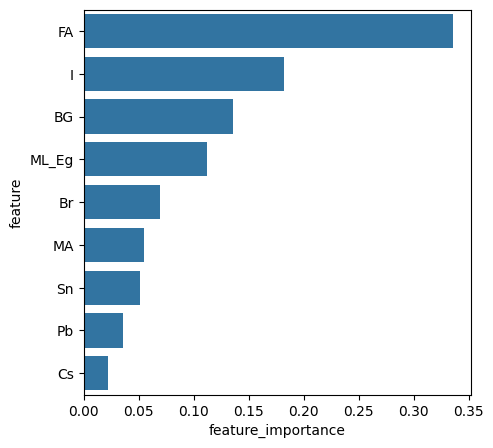

In [9]:
feature_importance = rf.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(5,5))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')

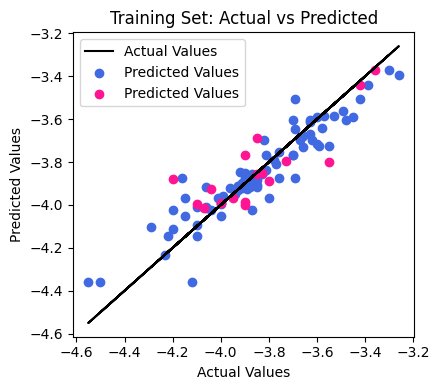

In [10]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train1, y_train1, color='black', label='Actual Values')
plt.scatter(y_train1, y_train_pred1, color='royalblue', label='Predicted Values')
plt.scatter(y_test1, y_pred1, color='deeppink', label='Predicted Values')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

##Gradient Boosting

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15,  random_state=100)
gbr=GradientBoostingRegressor()
gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores2 = cross_val_score(estimator=gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-mse_scores2)
print("RMSE: {:.4f}".format(rmse_scores2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores2.std()))

RMSE: 0.1618
Standard Deviation: 0.0365


In [12]:
#GBR on test set
y_pred2=gbr.predict(X_test2)
y_pred2=y_pred2.reshape(len(y_pred2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value2)
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

R value: 0.8531664263146045
MSE on Test Set: 0.015304708766954092
RMSE on Test Set: 0.12371220136653495


In [13]:
#GBR on train set
y_train_pred2 = gbr.predict(X_train2)
y_train_pred2=y_train_pred2.reshape(len(y_train_pred2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_p2)
print("MSE on Train Set:", mean_squared_error(y_train2, y_train_pred2))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred2)))

R value: 0.94419992308072
MSE on Train Set: 0.005955736922986673
RMSE on Train Set: 0.07717342109163408


In [14]:
np.set_printoptions(precision=2,suppress=True)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[-3.63 -3.55]
 [-3.73 -3.9 ]
 [-3.72 -3.73]
 [-4.03 -4.  ]
 [-3.98 -4.04]
 [-3.9  -3.8 ]
 [-3.31 -3.36]
 [-3.4  -3.42]
 [-3.58 -3.85]
 [-3.94 -3.9 ]
 [-3.86 -3.85]
 [-3.89 -3.83]
 [-3.88 -4.2 ]
 [-4.05 -3.9 ]
 [-3.9  -3.95]
 [-4.03 -4.07]
 [-4.04 -4.1 ]]


<Axes: xlabel='feature_importance', ylabel='feature'>

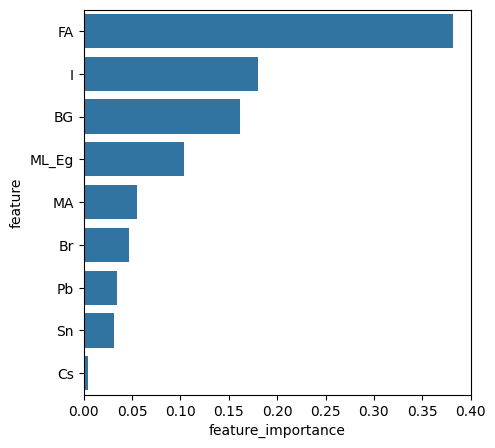

In [15]:
feature_importance = gbr.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(5,5))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')

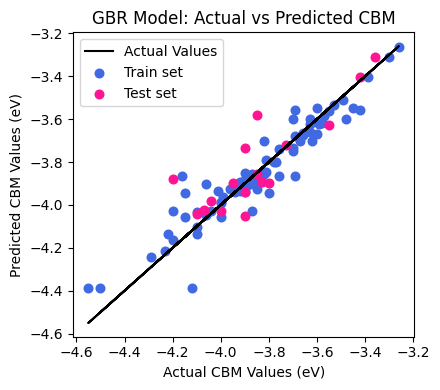

In [16]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test2, y_pred2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual CBM Values (eV)')
plt.ylabel('Predicted CBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('GBR Model: Actual vs Predicted CBM')
plt.savefig('GBR Model: Actual vs Predicted CBM.png')

plt.tight_layout()
plt.show()

##XGBoost

In [17]:
import xgboost as xgb
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.15, random_state=100)
xgb = xgb.XGBRegressor()
xgb.fit(X_train3,y_train3)

mse_scores3 = cross_val_score(estimator = xgb, X = X_train3, y = y_train3, cv = 5, scoring='neg_mean_squared_error')
rmse_scores3 = np.sqrt(-mse_scores3)
print("RMSE: {:.4f}".format(rmse_scores3.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores3.std()))

RMSE: 0.1865
Standard Deviation: 0.0492


In [18]:
#XGB on Test set
y_pred3=xgb.predict(X_test3)
y_pred3=y_pred3.reshape(len(y_pred3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred3)))

R2 on Test Set: 0.5818294748155829
R value: 0.8039435416960397
MAE on Test Set: 0.11151277486015773
RMSE on Test Set: 0.1438986465415323


In [19]:
#XGB on Train set
y_train_pred3 = xgb.predict(X_train3)

y_train_pred3=y_train_pred3.reshape(len(y_train_pred3),1)
r_value_p3 = np.corrcoef(y_train3.squeeze(), y_train_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train3, y_train_pred3))
print("R value:", r_value_p3)
print("MAE on Train Set:", mean_absolute_error(y_train3, y_train_pred3))
print("MSE on Train Set:", mean_squared_error(y_train3, y_train_pred3))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train3, y_train_pred3)))

R2 on Train Set: 0.9011364443911034
R value: 0.949283326806148
MAE on Train Set: 0.036736654671289594
MSE on Train Set: 0.005345661842942789
RMSE on Train Set: 0.07311403314646778


In [20]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test3.reshape(len(y_test3),1)),1))

[[-3.56 -3.55]
 [-3.7  -3.9 ]
 [-3.8  -3.73]
 [-4.02 -4.  ]
 [-3.9  -4.04]
 [-3.91 -3.8 ]
 [-3.3  -3.36]
 [-3.39 -3.42]
 [-3.61 -3.85]
 [-4.07 -3.9 ]
 [-3.85 -3.85]
 [-3.9  -3.83]
 [-3.86 -4.2 ]
 [-4.05 -3.9 ]
 [-3.92 -3.95]
 [-4.   -4.07]
 [-3.91 -4.1 ]]


<Axes: xlabel='feature_importance', ylabel='feature'>

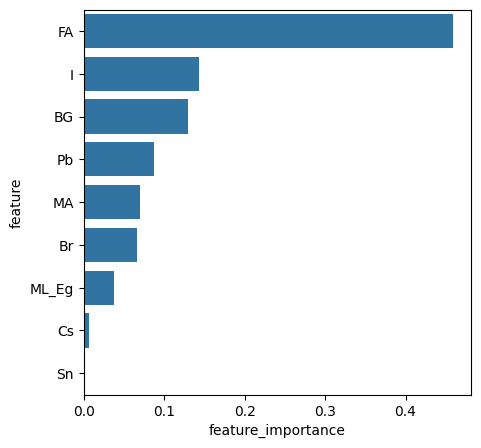

In [21]:
feature_importance = xgb.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(5,5))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')

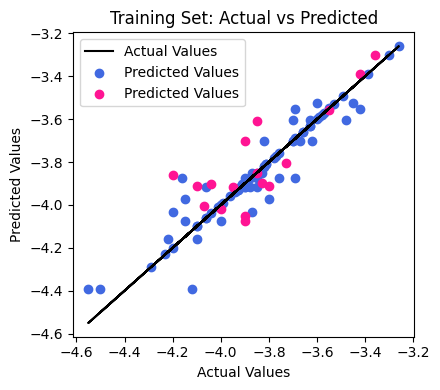

In [22]:
y_train_pred3 = xgb.predict(X_train3)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train3, y_train3, color='black', label='Actual Values')
plt.scatter(y_train3, y_train_pred3, color='royalblue', label='Predicted Values')
plt.scatter(y_test3, y_pred3, color='deeppink', label='Predicted Values')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

##CatBoost

In [23]:
from catboost import CatBoostRegressor
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.15, random_state=100)
catboost = CatBoostRegressor()
catboost.fit(X_train4, y_train4, verbose=0)

# Evaluating with cross-validation
mse_scores4 = cross_val_score(estimator = catboost, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores4 = np.sqrt(-mse_scores4)
print("RMSE: {:.4f}".format(rmse_scores4.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores4.std()))

Learning rate set to 0.027134
0:	learn: 0.2269932	total: 751us	remaining: 751ms
1:	learn: 0.2253660	total: 1.35ms	remaining: 675ms
2:	learn: 0.2237541	total: 1.85ms	remaining: 614ms
3:	learn: 0.2224728	total: 2.33ms	remaining: 579ms
4:	learn: 0.2219402	total: 2.59ms	remaining: 516ms
5:	learn: 0.2205282	total: 3.06ms	remaining: 508ms
6:	learn: 0.2185180	total: 3.57ms	remaining: 506ms
7:	learn: 0.2168802	total: 4.03ms	remaining: 500ms
8:	learn: 0.2156254	total: 4.57ms	remaining: 503ms
9:	learn: 0.2140108	total: 5.17ms	remaining: 511ms
10:	learn: 0.2124555	total: 5.64ms	remaining: 507ms
11:	learn: 0.2110670	total: 6.19ms	remaining: 509ms
12:	learn: 0.2095682	total: 6.73ms	remaining: 511ms
13:	learn: 0.2083669	total: 7.18ms	remaining: 506ms
14:	learn: 0.2072631	total: 7.63ms	remaining: 501ms
15:	learn: 0.2058291	total: 8.13ms	remaining: 500ms
16:	learn: 0.2045902	total: 8.49ms	remaining: 491ms
17:	learn: 0.2033307	total: 8.88ms	remaining: 484ms
18:	learn: 0.2023446	total: 9.32ms	remaining:

In [24]:
#CB on Test set
y_pred4 = catboost.predict(X_test4)
y_pred4 = y_pred4.reshape(len(y_pred4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred4)))

R2 on Test Set: 0.6643365916548816
R value: 0.8267740167317532
MAE on Test Set: 0.10023315414151493
MSE on Test Set: 0.01662126218499534
RMSE on Test Set: 0.12892347414259103


In [25]:
#CB on Train set
y_train_pred4 = catboost.predict(X_train4)

y_train_pred4=y_train_pred4.reshape(len(y_train_pred4),1)
r_value_p4 = np.corrcoef(y_train4.squeeze(), y_train_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train4, y_train_pred4))
print("R value:", r_value_p4)
print("MAE on Train Set:", mean_absolute_error(y_train4, y_train_pred4))
print("MSE on Train Set:", mean_squared_error(y_train4, y_train_pred4))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train4, y_train_pred4)))

R2 on Train Set: 0.8967953482715999
R value: 0.9473892147478232
MAE on Train Set: 0.04514869862929814
MSE on Train Set: 0.005580389713487726
RMSE on Train Set: 0.07470200608743868


In [26]:
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test4.reshape(len(y_test4),1)),1))

[[-3.68 -3.55]
 [-3.73 -3.9 ]
 [-3.81 -3.73]
 [-3.98 -4.  ]
 [-3.93 -4.04]
 [-3.99 -3.8 ]
 [-3.31 -3.36]
 [-3.4  -3.42]
 [-3.67 -3.85]
 [-3.98 -3.9 ]
 [-3.85 -3.85]
 [-3.89 -3.83]
 [-3.87 -4.2 ]
 [-4.   -3.9 ]
 [-3.97 -3.95]
 [-4.04 -4.07]
 [-3.98 -4.1 ]]


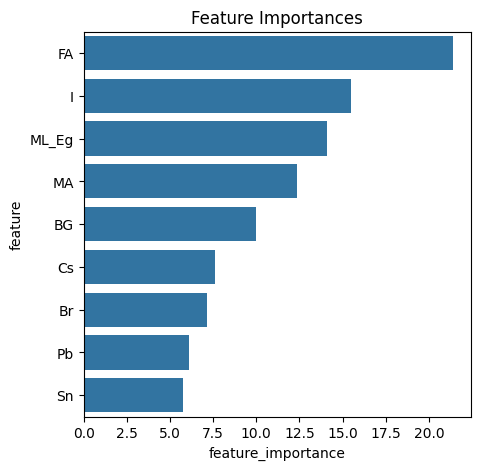

In [27]:
feature_importance = catboost.get_feature_importance()
feature_names = list(dfx.columns)
num_features = len(feature_names)
dic = {'feature': feature_names, 'feature_importance': feature_importance}

# Create a DataFrame with the feature importances
df_fi = pd.DataFrame(dic)
df_fi = df_fi.sort_values('feature_importance', ascending=False).reset_index(drop=True)

# Plot the top 30 feature importances
plt.figure(figsize=(5, 5))
sns.barplot(data=df_fi.head(30), x='feature_importance', y='feature')
plt.title('Feature Importances')
plt.show()


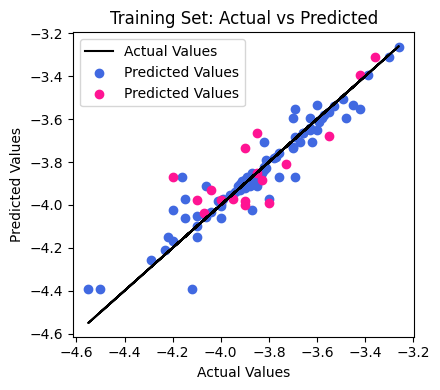

In [28]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred4, color='royalblue', label='Predicted Values')
plt.scatter(y_test4, y_pred4, color='deeppink', label='Predicted Values')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

#Hyperparameter tuning using Optuna

##Tuning of RF

In [29]:
import optuna
def objective1(trial):
    # Define the hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 100, 2000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])

    # Create the Random Forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=100
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train1, y_train1, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse

# Create the Optuna study and optimize the objective function
study1 = optuna.create_study(direction='minimize')
study1.optimize(objective1, n_trials=100)

[I 2025-03-26 23:38:27,209] A new study created in memory with name: no-name-7708bfb3-bc77-4c99-a470-3208305cf69c
[I 2025-03-26 23:38:31,047] Trial 0 finished with value: 0.23912807489743157 and parameters: {'n_estimators': 1197, 'max_depth': 17, 'min_samples_split': 17, 'min_samples_leaf': 29, 'max_features': 'log2'}. Best is trial 0 with value: 0.23912807489743157.
[I 2025-03-26 23:38:34,259] Trial 1 finished with value: 0.23031443854516742 and parameters: {'n_estimators': 1998, 'max_depth': 47, 'min_samples_split': 17, 'min_samples_leaf': 23, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.23031443854516742.
[I 2025-03-26 23:38:35,826] Trial 2 finished with value: 0.2205967744888443 and parameters: {'n_estimators': 117, 'max_depth': 39, 'min_samples_split': 32, 'min_samples_leaf': 12, 'max_features': 'log2'}. Best is trial 2 with value: 0.2205967744888443.
[I 2025-03-26 23:38:38,474] Trial 3 finished with value: 0.22751624387175015 and parameters: {'n_estimators': 1633, 'max_

In [30]:
# Print the best hyperparameters and the best score
print('Best trial:', study1.best_trial.number)
print("Best hyperparameters: ", study1.best_params)
print("Best RMSE: ", study1.best_value)

Best trial: 31
Best hyperparameters:  {'n_estimators': 620, 'max_depth': 34, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': None}
Best RMSE:  0.16582687916430924


In [31]:
# Train the model with the best hyperparameters
best_rf = RandomForestRegressor(**study1.best_params, random_state=100)
# Calculate cross-validated RMSE
mse_scores_c1 = cross_val_score(estimator=best_rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores_c1 = np.sqrt(-mse_scores_c1)
print("RMSE: {:.4f}".format(rmse_scores_c1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_c1.std()))

RMSE: 0.1640
Standard Deviation: 0.0245


In [32]:
best_rf.fit(X_train1,y_train1)

y_pred_n1=best_rf.predict(X_test1)
y_pred_n1=y_pred1.reshape(len(y_pred1),1)
r_value_n1 = np.corrcoef(y_test1.squeeze(), y_pred_n1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_n1)
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred_n1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred_n1)))

R value: 0.828695399876385
MSE on Test Set: 0.015706544546325172
RMSE on Test Set: 0.1253257537233476


In [33]:
#RF on Train set
y_train_pred1 = rf.predict(X_train1)
y_train_pred1=y_train_pred1.reshape(len(y_train_pred1),1)
r_value_p1 = np.corrcoef(y_train1.squeeze(), y_train_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_p1)
print("MSE on Train Set:", mean_squared_error(y_train1, y_train_pred1))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))

R value: 0.9314778812804171
MSE on Train Set: 0.007706566272110937
RMSE on Train Set: 0.0877870507085808


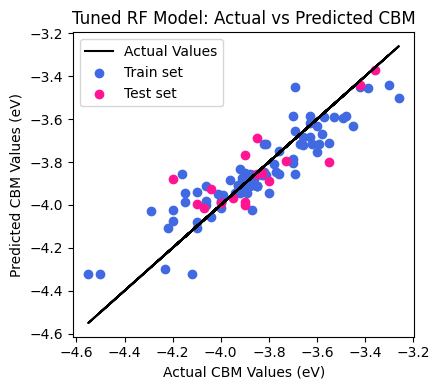

In [34]:
y_train_pred_n1=best_rf.predict(X_train1)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train1, y_train1, color='black', label='Actual Values')
plt.scatter(y_train1, y_train_pred_n1, color='royalblue', label='Train set')
plt.scatter(y_test1, y_pred_n1, color='deeppink', label='Test set')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual CBM Values (eV)')
plt.ylabel('Predicted CBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned RF Model: Actual vs Predicted CBM')
plt.savefig('Tuned RF Model: Actual vs Predicted CBM.png')
plt.tight_layout()
plt.show()

##Tuning for Gradient Boosting

In [35]:
import optuna
def objective2(trial):
    # Define the hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    # Create the Gradient Boosting model
    model = GradientBoostingRegressor(**params, random_state=100)

    # Perform cross-validation
    score = cross_val_score(model, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
# Create the Optuna study and optimize
study2 = optuna.create_study(direction='minimize')
study2.optimize(objective2, n_trials=100)

[I 2025-03-26 23:39:54,235] A new study created in memory with name: no-name-0928e6ed-7661-4bd9-96ec-11b0e855e301
[I 2025-03-26 23:39:56,226] Trial 0 finished with value: 0.21160403018405638 and parameters: {'n_estimators': 803, 'max_depth': 9, 'learning_rate': 0.12588391680853533, 'subsample': 0.7221109567493293, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.21160403018405638.
[I 2025-03-26 23:39:57,412] Trial 1 finished with value: 0.1673651870109333 and parameters: {'n_estimators': 415, 'max_depth': 6, 'learning_rate': 0.015240642478157734, 'subsample': 0.6286999066924583, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 1 with value: 0.1673651870109333.
[I 2025-03-26 23:39:57,978] Trial 2 finished with value: 0.20510245994366155 and parameters: {'n_estimators': 220, 'max_depth': 6, 'learning_rate': 0.18965298964745358, 'subsample': 0.6472043713906317, 'min_samples_split': 7, 'min_samples_leaf

In [36]:
# Print the best hyperparameters and the best score
print('Best trial:', study2.best_trial.number)
print("Best hyperparameters: ", study2.best_params)
print("Best RMSE: ", study2.best_value)

Best trial: 54
Best hyperparameters:  {'n_estimators': 491, 'max_depth': 3, 'learning_rate': 0.012173074692477151, 'subsample': 0.5818091997636632, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': None}
Best RMSE:  0.16070805975964736


In [37]:
# Train the final model with the best hyperparameters
best_gbr = GradientBoostingRegressor(**study2.best_params, random_state=100)
best_gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores_c2 = cross_val_score(estimator=best_gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores_c2 = np.sqrt(-mse_scores_c2)
print("RMSE: {:.4f}".format(rmse_scores_c2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_c2.std()))

RMSE: 0.1583
Standard Deviation: 0.0279


In [38]:
#TEST set
y_pred_n2=best_gbr.predict(X_test2)
y_pred_n2=y_pred_n2.reshape(len(y_pred_n2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred_n2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred_n2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred_n2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred_n2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred_n2)))

R2 on Test Set: 0.7277052248718661
R value: 0.8542345522726419
MAE on Test Set: 0.08586990951952624
MSE on Test Set: 0.01348339657075666
RMSE on Test Set: 0.11611802862069551


In [39]:
#GBR on Train set
y_train_pred_n2 = best_gbr.predict(X_train2)

y_train_pred_n2=y_train_pred_n2.reshape(len(y_train_pred_n2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred_n2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train2, y_train_pred_n2))
print("R value:", r_value_p2)
print("MAE on Train Set:", mean_absolute_error(y_train2, y_train_pred_n2))
print("MSE on Train Set:", mean_squared_error(y_train2, y_train_pred_n2))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred_n2)))

R2 on Train Set: 0.8313561449051977
R value: 0.9159209132202495
MAE on Train Set: 0.07206060654429852
MSE on Train Set: 0.009118759847091035
RMSE on Train Set: 0.09549219783359808


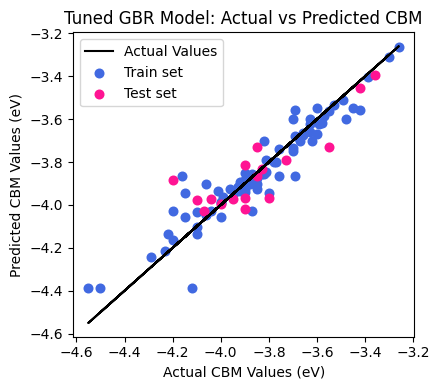

In [40]:
#Plot
y_train_pred_n2=best_gbr.predict(X_train2)

# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test2, y_pred_n2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set')
plt.xlabel('Actual CBM Values (eV)')
plt.ylabel('Predicted CBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned GBR Model: Actual vs Predicted CBM')
plt.savefig('Tuned GBR Model: Actual vs Predicted CBM.png')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

##Tuning of XGBoost

In [41]:
from xgboost import XGBRegressor
def objective3(trial):
    # Define the hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5)
    }

    # Create the XGBoost model
    model = XGBRegressor(**params, random_state=100, use_label_encoder=False, eval_metric='rmse')

    # Perform cross-validation
    score = cross_val_score(model, X_train3, y_train3, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
study3 = optuna.create_study(direction='minimize')
study3.optimize(objective3, n_trials=100)

[I 2025-03-26 23:42:10,603] A new study created in memory with name: no-name-12888b46-8808-4e3e-8012-31e64b4f36f6
[I 2025-03-26 23:42:11,039] Trial 0 finished with value: 0.21576554900266318 and parameters: {'n_estimators': 684, 'max_depth': 9, 'learning_rate': 0.020055739744537893, 'subsample': 0.5896204450616926, 'min_child_weight': 10, 'colsample_bytree': 0.5466828190309476, 'gamma': 0.2585467497332911}. Best is trial 0 with value: 0.21576554900266318.
[I 2025-03-26 23:42:11,562] Trial 1 finished with value: 0.21990557612860248 and parameters: {'n_estimators': 858, 'max_depth': 4, 'learning_rate': 0.13876668295025615, 'subsample': 0.7868330113566521, 'min_child_weight': 6, 'colsample_bytree': 0.5218873258954059, 'gamma': 0.3837603929460267}. Best is trial 0 with value: 0.21576554900266318.
[I 2025-03-26 23:42:11,956] Trial 2 finished with value: 0.20658582328528038 and parameters: {'n_estimators': 513, 'max_depth': 7, 'learning_rate': 0.14866733819507563, 'subsample': 0.887509128621

In [42]:
# Print the best hyperparameters and the corresponding R2 score
print(f'Best trial: {study3.best_trial.number}')
print(f'Best value (R2): {study3.best_trial.value}')
print(f'Best hyperparameters: {study3.best_trial.params}')

Best trial: 90
Best value (R2): 0.16491691929165478
Best hyperparameters: {'n_estimators': 919, 'max_depth': 4, 'learning_rate': 0.05074222360469991, 'subsample': 0.6995160708240777, 'min_child_weight': 2, 'colsample_bytree': 0.6330256977903106, 'gamma': 0.026090865350980215}


In [43]:
# Train the final model with the best hyperparameters
best_xgb = XGBRegressor(**study3.best_params, random_state=100)
best_xgb.fit(X_train3, y_train3)

# Evaluating with cross-validation
mse_scores_n3 = cross_val_score(best_xgb, X_train3, y_train3, cv=5,  scoring='neg_mean_squared_error')
rmse_scores_n3 = np.sqrt(-mse_scores_n3)
print("RMSE: {:.4f}".format(rmse_scores_n3.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_n3.std()))

RMSE: 0.1603
Standard Deviation: 0.0388


In [44]:
y_pred_n3=best_xgb.predict(X_test3)
y_pred_n3=y_pred_n3.reshape(len(y_pred_n3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred_n3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred_n3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred_n3))
print("MSE on Test Set:", mean_squared_error(y_test3, y_pred_n3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred_n3)))

R2 on Test Set: 0.7114531957258947
R value: 0.8442631599633524
MAE on Test Set: 0.0931490937401267
MSE on Test Set: 0.014288158813996582
RMSE on Test Set: 0.11953308669149551


In [45]:
#GBR on Train set
y_train_pred_n3 = best_xgb.predict(X_train3)

y_train_pred_n3=y_train_pred_n3.reshape(len(y_train_pred_n3),1)
r_value_p3 = np.corrcoef(y_train4.squeeze(), y_train_pred_n3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train3, y_train_pred_n3))
print("R value:", r_value_p3)
print("MAE on Train Set:", mean_absolute_error(y_train3, y_train_pred_n3))
print("MSE on Train Set:", mean_squared_error(y_train3, y_train_pred_n3))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train3, y_train_pred_n3)))

R2 on Train Set: 0.8330945464714309
R value: 0.9173562012776162
MAE on Train Set: 0.06994427414350612
MSE on Train Set: 0.009024762550887293
RMSE on Train Set: 0.09499875025960759


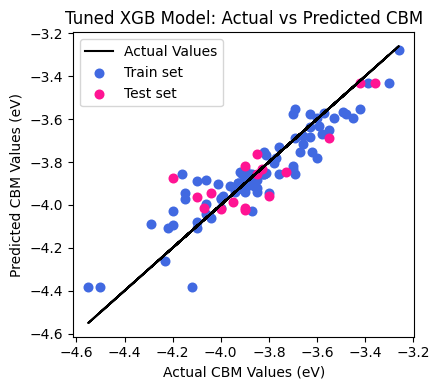

In [46]:
y_train_pred_n3 = best_xgb.predict(X_train3)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train3, y_train3, color='black', label='Actual Values')
plt.scatter(y_train3, y_train_pred_n3, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test3, y_pred_n3, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set')
plt.xlabel('Actual CBM Values (eV)')
plt.ylabel('Predicted CBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned XGB Model: Actual vs Predicted CBM')
plt.savefig('Tuned XGB Model: Actual vs Predicted CBM.png')

plt.tight_layout()
plt.show()

##Tuning of CatBoost

In [47]:
import optuna
def objective4(trial):
    # Define the hyperparameters to be optimized
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10, log=True),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50)
    }

    # Create the CatBoost model
    model = CatBoostRegressor(
        **params,
        logging_level='Silent',
        random_seed=100
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train4, y_train4, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
# Create the Optuna study and optimize the objective function
study4 = optuna.create_study(direction='minimize')
study4.optimize(objective4, n_trials=100)

[I 2025-03-26 23:43:06,188] A new study created in memory with name: no-name-17ff216f-618c-4260-bc41-d34c92d4de7e
[I 2025-03-26 23:43:11,850] Trial 0 finished with value: 0.20986292880884005 and parameters: {'iterations': 566, 'depth': 10, 'learning_rate': 0.21716274589707024, 'l2_leaf_reg': 0.0015455731540336822, 'bagging_temperature': 0.4070901205603997, 'random_strength': 8.39469591871108, 'border_count': 27, 'od_type': 'Iter', 'od_wait': 40}. Best is trial 0 with value: 0.20986292880884005.
[I 2025-03-26 23:43:13,707] Trial 1 finished with value: 0.18899089349687245 and parameters: {'iterations': 519, 'depth': 6, 'learning_rate': 0.00765592678797085, 'l2_leaf_reg': 2.22690651403106, 'bagging_temperature': 0.4402760380865923, 'random_strength': 1.6362035744377765, 'border_count': 28, 'od_type': 'Iter', 'od_wait': 27}. Best is trial 1 with value: 0.18899089349687245.
[I 2025-03-26 23:43:15,762] Trial 2 finished with value: 0.1949622862942658 and parameters: {'iterations': 369, 'depth

In [48]:
# Print the best hyperparameters and the best score
print(f'Best trial: {study4.best_trial.number}')
print("Best hyperparameters: ", study4.best_params)
print("Best RMSE: ", study4.best_value)

Best trial: 83
Best hyperparameters:  {'iterations': 728, 'depth': 4, 'learning_rate': 0.028679469976451485, 'l2_leaf_reg': 4.767546601630589, 'bagging_temperature': 0.8107193955168998, 'random_strength': 2.2935353946183313e-05, 'border_count': 174, 'od_type': 'Iter', 'od_wait': 16}
Best RMSE:  0.16409991697201395


In [49]:
# Train the model with the best hyperparameters
best_cb = CatBoostRegressor(
    **study4.best_params,
    random_seed=100
)

best_cb.fit(X_train4, y_train4, verbose=0)

mse_scores = cross_val_score(estimator = best_cb, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
print("RMSE: {:.4f}".format(rmse_scores.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores.std()))

0:	learn: 0.2265467	total: 392us	remaining: 286ms
1:	learn: 0.2244622	total: 840us	remaining: 305ms
2:	learn: 0.2224281	total: 1.28ms	remaining: 310ms
3:	learn: 0.2204399	total: 1.59ms	remaining: 289ms
4:	learn: 0.2184999	total: 1.93ms	remaining: 279ms
5:	learn: 0.2166039	total: 2.21ms	remaining: 266ms
6:	learn: 0.2150904	total: 2.46ms	remaining: 253ms
7:	learn: 0.2137194	total: 2.73ms	remaining: 246ms
8:	learn: 0.2123768	total: 2.98ms	remaining: 238ms
9:	learn: 0.2110621	total: 3.24ms	remaining: 233ms
10:	learn: 0.2097747	total: 3.5ms	remaining: 228ms
11:	learn: 0.2080766	total: 3.8ms	remaining: 227ms
12:	learn: 0.2068442	total: 4.06ms	remaining: 223ms
13:	learn: 0.2053993	total: 4.31ms	remaining: 220ms
14:	learn: 0.2039878	total: 4.6ms	remaining: 219ms
15:	learn: 0.2026088	total: 4.85ms	remaining: 216ms
16:	learn: 0.2012616	total: 5.1ms	remaining: 213ms
17:	learn: 0.1999456	total: 5.36ms	remaining: 211ms
18:	learn: 0.1986344	total: 5.62ms	remaining: 210ms
19:	learn: 0.1973682	total: 

In [50]:
y_pred_n4 = best_cb.predict(X_test4)
y_pred_n4 = y_pred_n4.reshape(len(y_pred_n4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred_n4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred_n4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred_n4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred_n4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred_n4)))

R2 on Test Set: 0.7053621681545607
R value: 0.8495781977383108
MAE on Test Set: 0.08686454450802164
MSE on Test Set: 0.014589772167499467
RMSE on Test Set: 0.12078812924910902


In [51]:
#CB on Train set
y_train_pred_n4 = best_cb.predict(X_train4)

y_train_pred_n4=y_train_pred_n4.reshape(len(y_train_pred_n4),1)
r_value_p4 = np.corrcoef(y_train4.squeeze(), y_train_pred_n4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train4, y_train_pred_n4))
print("R value:", r_value_p4)
print("MAE on Train Set:", mean_absolute_error(y_train4, y_train_pred_n4))
print("MSE on Train Set:", mean_squared_error(y_train4, y_train_pred_n4))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train4, y_train_pred_n4)))

R2 on Train Set: 0.8688933152027734
R value: 0.9343882691108366
MAE on Train Set: 0.06026391136489875
MSE on Train Set: 0.007089083514736479
RMSE on Train Set: 0.08419669539083158


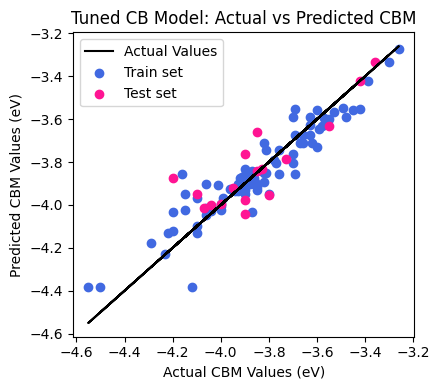

In [52]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred_n4, color='royalblue', label='Train set')
plt.scatter(y_test4, y_pred_n4, color='deeppink', label='Test set')

plt.xlabel('Actual CBM Values (eV)')
plt.ylabel('Predicted CBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned CB Model: Actual vs Predicted CBM')
plt.savefig('Tuned CB Model: Actual vs Predicted CBM.png')


plt.tight_layout()
plt.show()

#SHAP Analysis

In [53]:
import shap
shap.initjs()

In [54]:
dfx.shape

(110, 9)

In [55]:
col=dfx.columns
dfx_test = pd.DataFrame(data=X_train2, columns=col)

In [56]:
explainer=shap.Explainer(gbr)
shap_values=explainer(dfx_test[0:300])

In [57]:
np.shape(shap_values.values)

(93, 9)

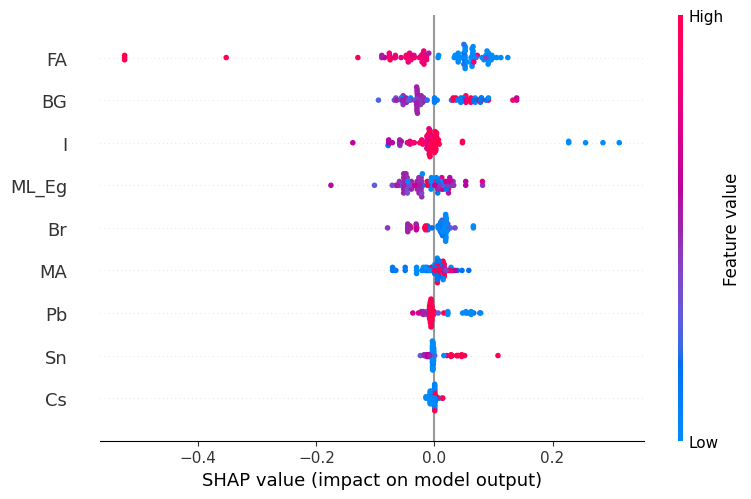

In [58]:
plt.figure(figsize=(8, 4))
shap.summary_plot(shap_values)
plt.show()

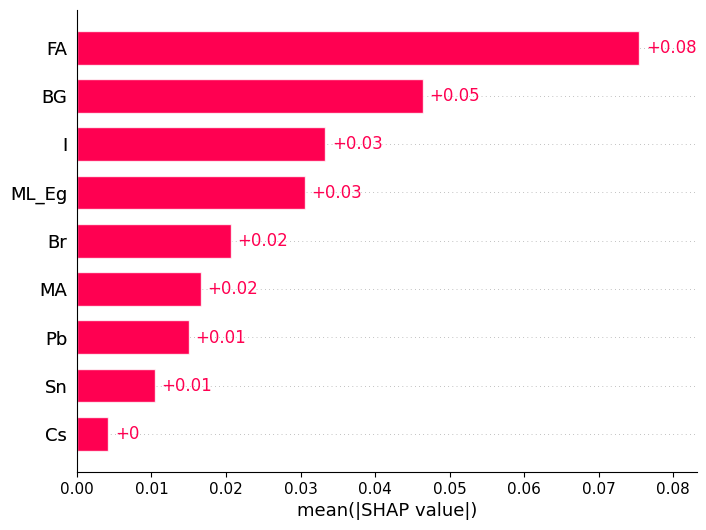

In [59]:
plt.figure(figsize=(5, 3))
shap.plots.bar(shap_values)
plt.show()